In [1]:
import numpy as np

csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

positions = fuji[:,0]
elevations = fuji[:,3]

### 【問題1】データの可視化

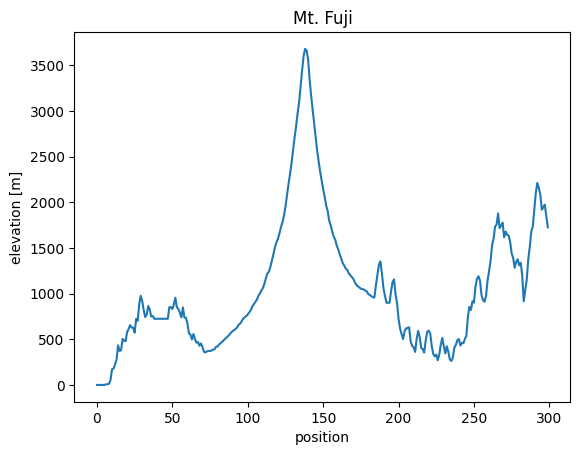

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation [m]")
plt.plot(positions, elevations)
plt.show()

### 【問題2】ある地点の勾配を計算する関数を作成

In [3]:
def gradient(position: int) -> float:
    return elevations[position] - elevations[position - 1] if position else 0.0

### 【問題3】移動先の地点を計算する関数を作成

In [4]:
def destination(position: int, alpha=0.2) -> int:
    destination = round(position - alpha * gradient(position))
    destination = max(destination, int(positions[0]))
    destination = min(destination, int(positions[-1]))
    return destination

### 【問題4】山を下る関数を作成

In [5]:
def descent_process(position: int, alpha=0.2):
    process = [position]
    while process[-1] not in process[:-1]:
        process.append(destination(process[-1], alpha))
    return process[:-1]

pos = 136
print(f'{pos}地点からの下山過程：{descent_process(pos, 0.1)}')

136地点からの下山過程：[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]


### 【問題5】下山過程の可視化

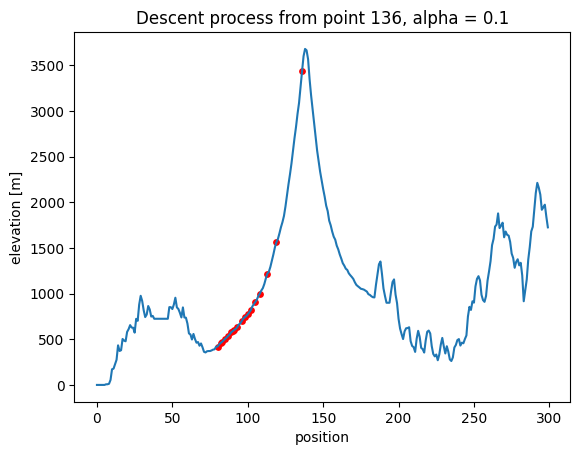

In [6]:
def graph(position, alpha=0.2):
    process = descent_process(position, alpha)
    plt.title(f'Descent process from point {position}, alpha = {alpha}')
    plt.xlabel("position")
    plt.ylabel("elevation [m]")
    plt.plot(positions, elevations)
    plt.scatter(process, elevations[process], 15, c='red')
    plt.show()

graph(136, 0.1)

### 【問題6】初期値の変更

In [7]:
for i in positions:
    print(f'{int(i)}地点からの下山過程：{descent_process(int(i), 0.1)}')

0地点からの下山過程：[0]
1地点からの下山過程：[1]
2地点からの下山過程：[2]
3地点からの下山過程：[3]
4地点からの下山過程：[4]
5地点からの下山過程：[5]
6地点からの下山過程：[6, 5]
7地点からの下山過程：[7]
8地点からの下山過程：[8]
9地点からの下山過程：[9, 5]
10地点からの下山過程：[10, 0]
11地点からの下山過程：[11, 10, 0]
12地点からの下山過程：[12, 7]
13地点からの下山過程：[13, 8]
14地点からの下山過程：[14, 0]
15地点からの下山過程：[15, 21, 18, 20, 10, 0]
16地点からの下山過程：[16, 15, 21, 18, 20, 10, 0]
17地点からの下山過程：[17, 5]
18地点からの下山過程：[18, 20, 10, 0]
19地点からの下山過程：[19, 20, 10, 0]
20地点からの下山過程：[20, 10, 0]
21地点からの下山過程：[21, 18, 20, 10, 0]
22地点からの下山過程：[22, 18, 20, 10, 0]
23地点からの下山過程：[23, 26, 11, 10, 0]
24地点からの下山過程：[24]
25地点からの下山過程：[25, 30, 36, 44]
26地点からの下山過程：[26, 11, 10, 0]
27地点からの下山過程：[27, 29, 19, 20, 10, 0]
28地点からの下山過程：[28, 10, 0]
29地点からの下山過程：[29, 19, 20, 10, 0]
30地点からの下山過程：[30, 36, 44]
31地点からの下山過程：[31, 41]
32地点からの下山過程：[32, 39]
33地点からの下山過程：[33, 30, 36, 44]
34地点からの下山過程：[34, 25, 30, 36, 44]
35地点からの下山過程：[35, 39]
36地点からの下山過程：[36, 44]
37地点からの下山過程：[37, 36, 44]
38地点からの下山過程：[38, 41]
39地点からの下山過程：[39]
40地点からの下山過程：[40]
41地点からの下山過程：[41]
42地点からの下山過程：[42]
43地点からの下山過程：[43]


### 【問題7】初期値ごとの下山過程の可視化

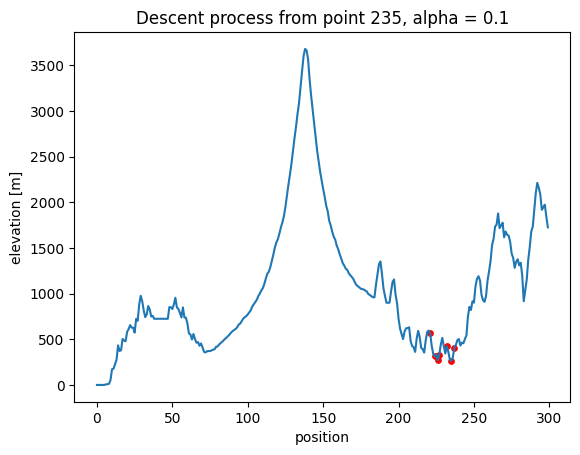

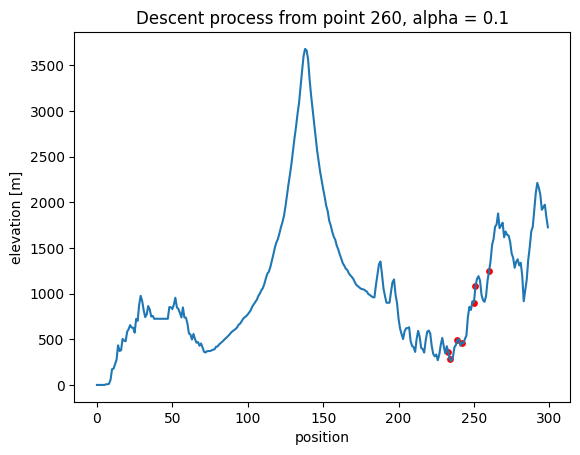

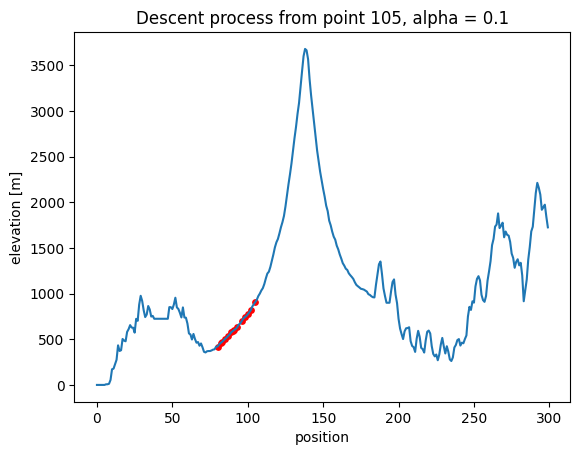

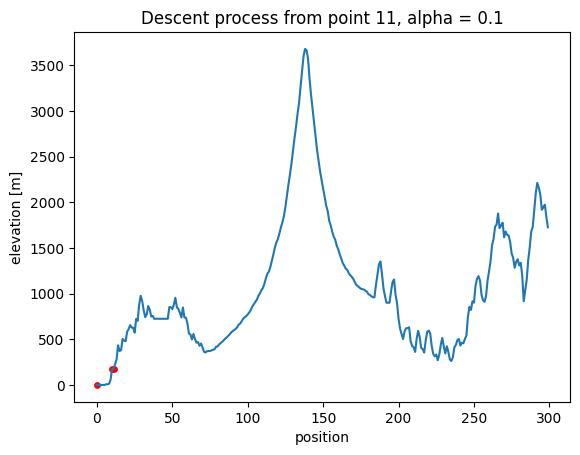

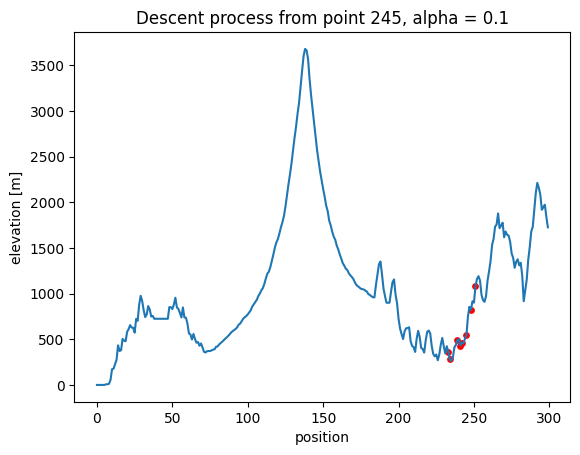

In [8]:
for i in np.random.randint(positions[0], positions[-1], 5):
    graph(int(i), 0.1)

### 【問題8】（アドバンス問題）ハイパーパラメータの変更

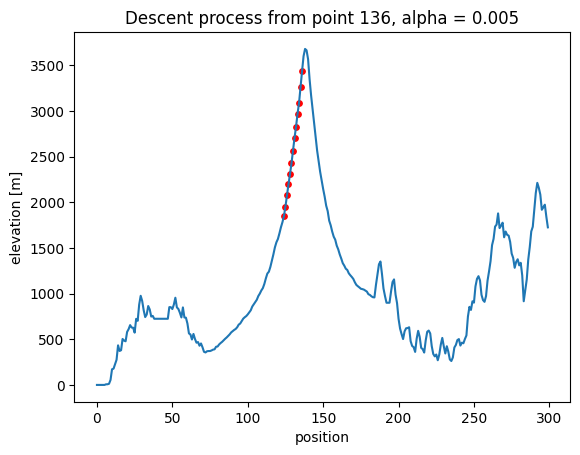

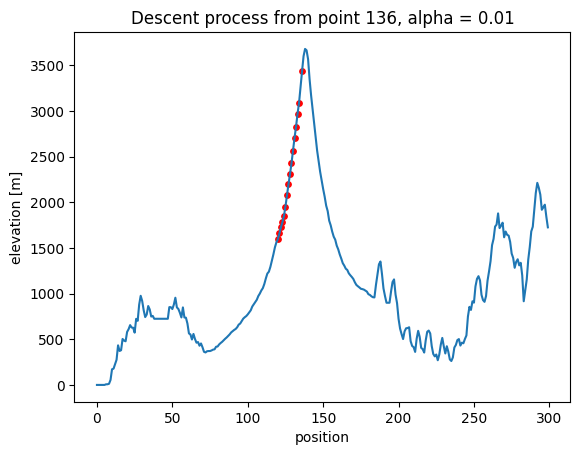

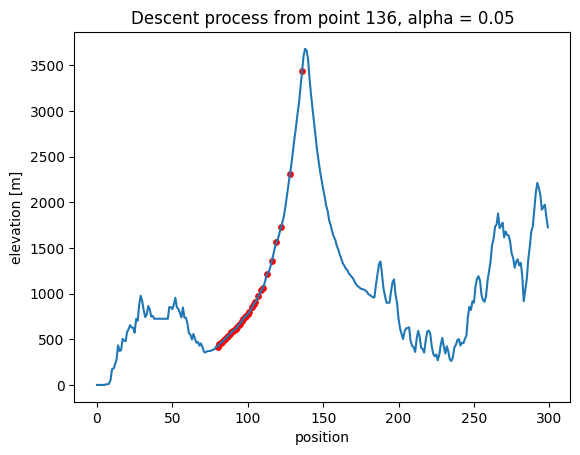

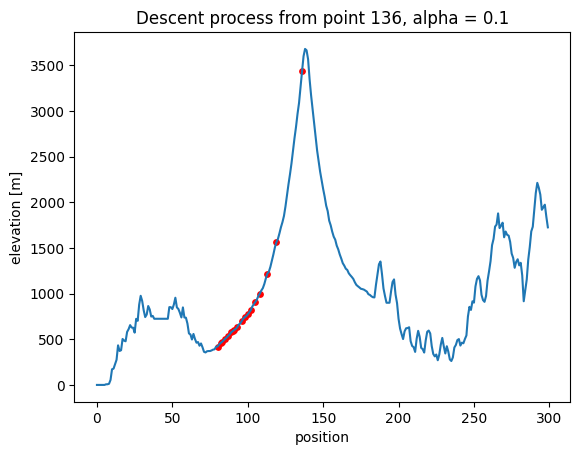

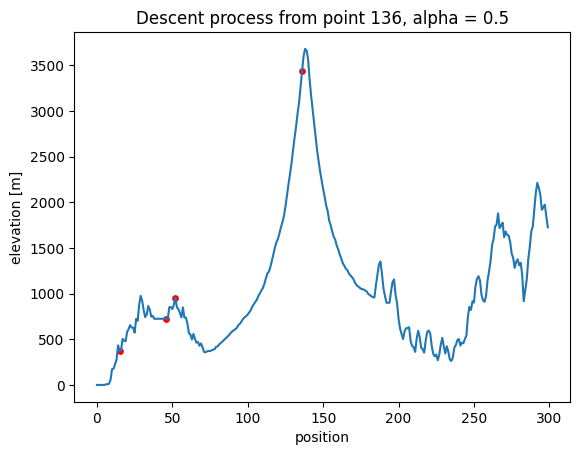

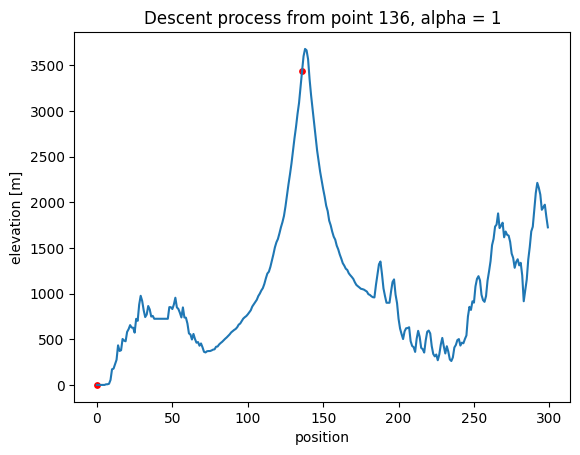

In [9]:
for alpha in [0.005, 0.01, 0.05, 0.1, 0.5, 1]:
    graph(136, alpha)